In [2]:
import sys
import os
import importlib

# Ajout du chemin une fois
sys.path.append(os.path.abspath('../python_files'))

# Liste des noms des modules à importer et recharger
module_names = [
    'preprocessing',
    'imports',
    'files',
    'clustering',
    'profile_prediction',
    'prediction_24h'
]

# Import et reload automatique
modules = {}
for name in module_names:
    modules[name] = importlib.import_module(name)
    importlib.reload(modules[name])

# Importer tout en global namespace (équivalent à from ... import *)
for name in module_names:
    exec(f'from {name} import *')


In [3]:
consommation_chauffage = extract_and_concat_consommation(Simulation_Dataset, column_index=4, prefix="consommation_heat_")


In [4]:

# Exemple d'utilisation
city_groups = {
    "Weather_Dataset": Weather_Dataset
   
    
}

prefix_column_map = {
    "Text_": 1,
    "Hum_": 3,
    "Wind_": 4,
    "Solar_": 5,
    "Ground_": 10
}

combined_data = extract_and_combine_all(city_groups, prefix_column_map)

city_groups = {
    "Simulation_Dataset":Simulation_Dataset  
}

prefix_column_map = {
    "Tint_": 2,   
}

combined_Tint = extract_and_combine_all(city_groups, prefix_column_map)


In [5]:
Text_combined = combined_data.get('Text_combined_Weather_Dataset')
Hum_combined = combined_data.get('Hum_combined_Weather_Dataset')
Wind_combined = combined_data.get('Wind_combined_Weather_Dataset')
Tint_combined = combined_Tint.get('Tint_combined_Simulation_Dataset')


In [6]:
start_date = "2018-01-01"
dates = pd.date_range(start=start_date, periods=len(consommation_chauffage), freq="D") 
consommation_chauffage.insert(0, "Date", dates)
Text_combined.insert(0, "Date", dates)
Hum_combined.insert(0, "Date", dates)

In [7]:
def add_heating_season(df, date_column='Date'):
    """
    Ajoute une colonne 'heat_on' qui vaut 1 si la date est entre le 1er novembre et le 30 avril, sinon 0.

    """ 
    # Extraire le mois et le jour
    month_day = df[date_column].dt.month * 100 + df[date_column].dt.day
    
    # Appliquer la condition: 1 si entre 1101 (1er nov) et 0430 (30 avril), sinon 0
    df['heat_on'] = ((month_day >= 1101) | (month_day <= 430)).astype(int)
    
    return df



In [8]:

add_heating_season(consommation_chauffage)
add_heating_season(Text_combined)
add_heating_season(Hum_combined)

,Date,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,heat_on
0,2018-01-01,82.0,81.0,80.5,83.0,84.5,84.0,85.0,85.0,81.0,...,58.0,72.0,79.0,83.5,83.0,84.0,86.0,86.5,86.5,1
1,2018-01-02,87.0,88.0,88.5,89.0,89.0,89.5,89.5,89.5,90.0,...,86.0,86.5,88.0,89.5,89.5,89.5,90.5,91.0,91.0,1
2,2018-01-03,91.0,90.0,88.0,84.5,80.5,78.0,76.0,76.0,78.0,...,69.5,69.0,71.0,73.5,75.0,75.5,75.5,80.0,85.0,1
3,2018-01-04,85.0,84.5,84.5,85.0,84.5,83.5,82.5,81.5,80.5,...,61.0,60.5,63.0,69.5,74.5,74.5,70.5,73.0,77.5,1
4,2018-01-05,76.5,76.0,77.0,79.5,81.5,83.0,84.5,84.5,84.5,...,55.5,60.0,68.0,75.0,79.0,82.5,86.5,91.0,94.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2550,2024-12-25,98.0,98.5,99.5,100.0,100.0,100.0,99.5,99.5,100.0,...,72.5,70.5,73.0,78.0,82.5,87.5,92.0,94.5,96.5,1
2551,2024-12-26,98.5,99.0,99.0,99.5,100.0,100.0,99.5,99.0,99.0,...,58.0,58.5,65.0,74.5,81.0,83.0,84.5,86.0,89.0,1
2552,2024-12-27,90.5,90.5,91.5,92.0,92.0,92.5,93.5,94.5,94.5,...,55.5,54.0,59.0,72.5,83.0,86.5,88.5,92.0,95.0,1
2553,2024-12-28,97.0,98.0,98.0,98.5,99.0,99.0,99.5,100.0,100.0,...,89.5,87.0,86.5,90.0,93.0,93.5,94.5,95.5,96.5,1


In [9]:
df_conso = consommation_chauffage[consommation_chauffage["heat_on"] == 1].copy()
df_Text = Text_combined[Text_combined["heat_on"] == 1].copy()
df_Hum = Hum_combined[Hum_combined["heat_on"] == 1].copy()



In [10]:
clustering_heat_toulouse = clustering(
    df=df_conso.drop(columns=["Date"]),  
    n_parts=1,                          
    status_column="heat_on",           
    n_clusters_list=[3]                
)



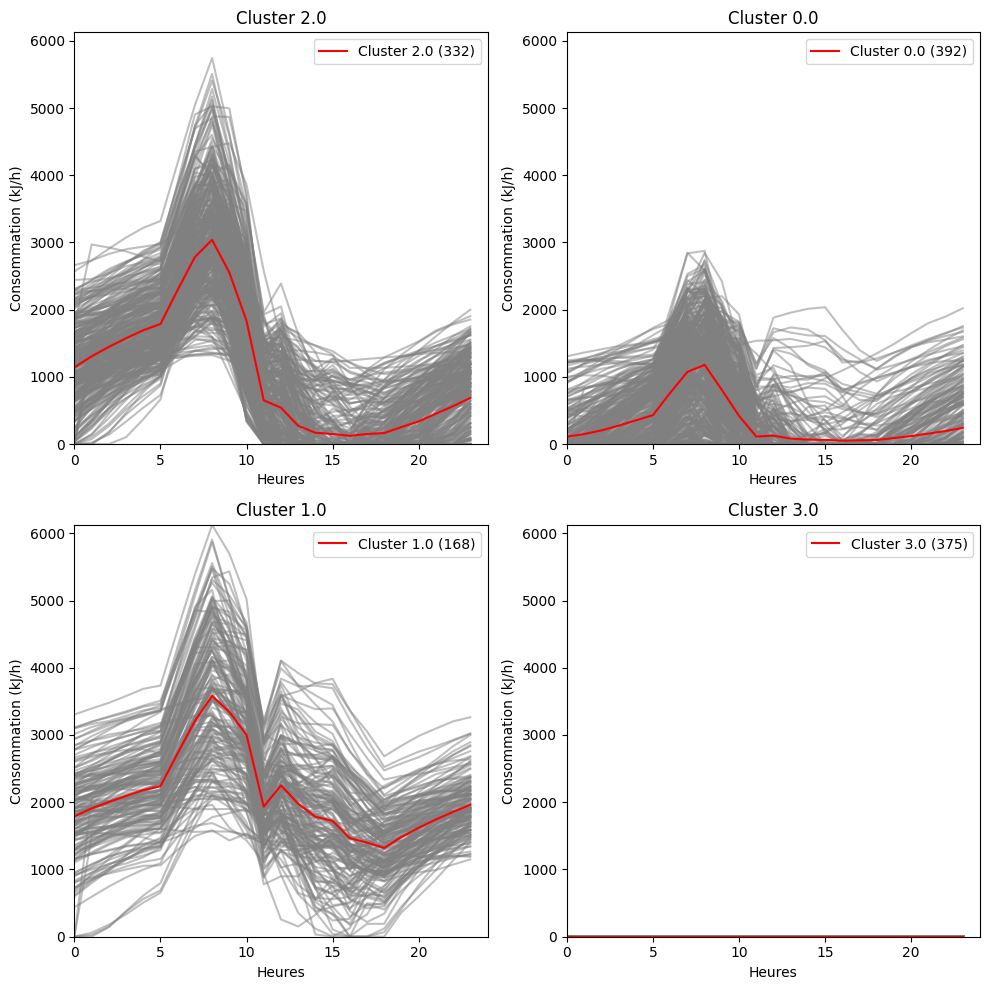

In [11]:
plot_clusters(clustering_heat_toulouse.drop(columns=["heat_on"]))

In [13]:
Text_conso_heat_tou=pd.concat([df_Text,clustering_heat_toulouse["clusters_1"]],axis=1)


Évaluation de Random Forest...


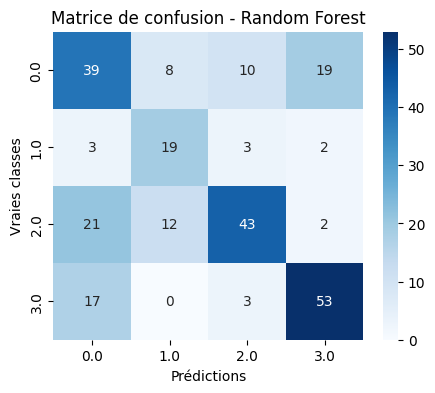

Random Forest - F1: 0.6080 - Accuracy: 0.6063 - Temps: 0.74s
###################################################################

Évaluation de Logistic Regression...


c:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


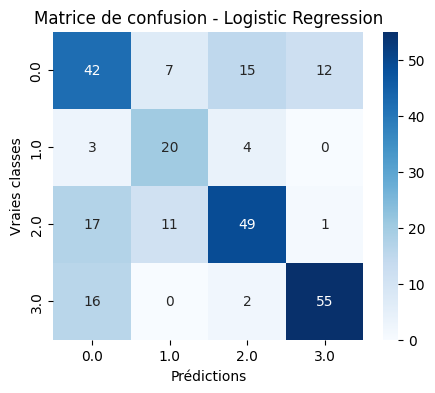

Logistic Regression - F1: 0.6562 - Accuracy: 0.6535 - Temps: 0.52s
###################################################################

Évaluation de SVC...


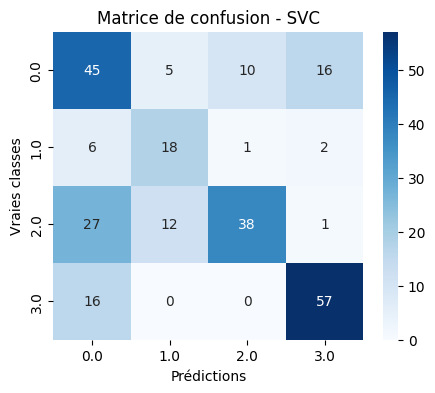

SVC - F1: 0.6238 - Accuracy: 0.6220 - Temps: 0.08s
###################################################################

Évaluation de KNN...


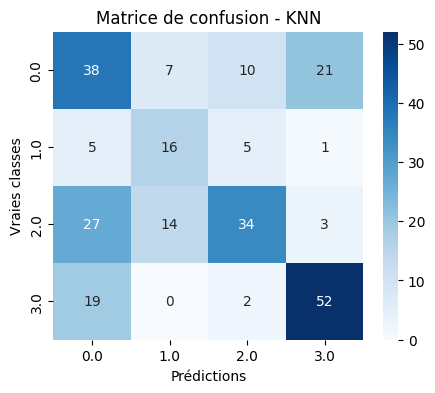

KNN - F1: 0.5521 - Accuracy: 0.5512 - Temps: 0.02s
###################################################################

Évaluation de Gradient Boosting...


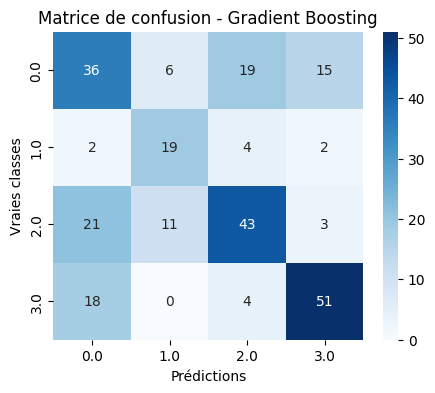

Gradient Boosting - F1: 0.5869 - Accuracy: 0.5866 - Temps: 4.83s
###################################################################


In [14]:

Text_conso_heat_tou.columns = Text_conso_heat_tou.columns.astype(str)
re, Test_Text_heat_toulouse = evaluate_models_split(
    df=Text_conso_heat_tou.drop(columns=["Date"]),
    target_cols="clusters_1",
    models=models,
    split_ratio=8
)

In [115]:
Text_conso_heat_tou=pd.concat([df_Text,clustering_heat_toulouse.drop(columns=["heat_on"])],axis=1)

In [116]:
Text_combined['clusters'] = 4

# Assigner les valeurs de clustering_heat_toulouse uniquement pour les indices correspondants
valid_indices = Text_combined.index.intersection(clustering_heat_toulouse.index)
Text_combined.loc[valid_indices, 'clusters'] = clustering_heat_toulouse.loc[valid_indices, 'clusters_1'].values

In [117]:
Text_conso_heat_tou.loc[Test_Text_heat_toulouse.index, "clusters_1"] = \
    Test_Text_heat_toulouse["y_pred_Gradient Boosting_clusters_1"]

In [32]:
Text_conso_heat_tou

,Date,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,clusters_1
0,2018-01-01,9.060,8.930,8.500,8.140,7.985,7.810,7.800,7.810,7.950,...,0.000000,46.882802,0.000000,12.597284,165.032178,309.615664,454.360768,581.485442,692.696269,2.0
1,2018-01-02,9.500,9.200,8.975,8.840,8.770,8.620,8.660,8.930,9.170,...,1216.862847,1081.300624,1000.744376,927.574038,938.912098,939.342954,961.082691,984.154059,990.419856,2.0
2,2018-01-03,13.715,13.685,13.870,14.490,15.240,15.570,15.760,15.765,15.485,...,0.000000,0.000000,0.000000,0.000000,68.356592,200.292594,324.326513,405.764384,454.396293,0.0
3,2018-01-04,13.885,14.855,15.375,15.390,15.465,15.500,15.530,15.540,15.495,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,2018-01-05,12.245,12.035,11.640,11.025,10.375,9.815,9.370,9.015,8.880,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2550,2024-12-25,6.590,6.480,6.280,6.235,6.215,6.090,5.925,5.740,5.530,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.229098,139.156888,406.034844,1.0
2551,2024-12-26,3.025,2.570,2.105,1.640,1.165,0.835,0.600,0.355,0.255,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
2552,2024-12-27,1.180,0.855,0.530,0.130,-0.230,-0.565,-0.910,-1.245,-1.405,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
2553,2024-12-28,1.145,0.350,-0.360,-0.480,-0.235,-0.165,-0.150,-0.035,0.020,...,226.016523,218.062033,321.023562,735.785798,1019.575515,1227.225707,1398.159522,1555.576905,1690.983459,2.0


In [114]:
Text_conso_j_1=pd.concat([Text_combined,consommation_chauffage.drop(columns=["Date","heat_on"])],axis=1)


In [34]:

Text_conso_heat_tou = Text_conso_heat_tou.sort_values('Date')
Text_conso_j_1 = Text_conso_j_1.sort_values('Date')

# Créer une liste pour stocker les lignes combinées
combined_rows = []

# Parcourir chaque ligne de Text_conso_heat_tou
for index, row in Text_conso_heat_tou.iterrows():
    jour_precedent = row['Date'] - pd.Timedelta(days=1)  # Trouver jour j-1
    
    # Vérifier si j-1 existe dans Text_combined
    prev_row = Text_conso_j_1[Text_conso_j_1['Date'] == jour_precedent]
    
    if not prev_row.empty:
        prev_row = prev_row.iloc[0]  # Sélectionner uniquement la première correspondance
        
        # Ajouter un suffixe "_j-1" aux colonnes du jour précédent
        #prev_row = prev_row.rename(lambda x: f"{x}_j-1")

        # Fusionner proprement les deux lignes
        combined_row = pd.concat([prev_row.to_frame().T.reset_index(drop=True), 
                                  row.to_frame().T.reset_index(drop=True)], axis=1)
        
        combined_rows.append(combined_row)  # Ajouter la ligne fusionnée
    else:
        # Si aucune correspondance, passer à la ligne suivante sans l'ajouter
        continue

# Convertir la liste en DataFrame final
Text_final = pd.concat(combined_rows, ignore_index=True)

Text_final2 = Text_final.drop(columns=[col for col in Text_final.columns if "Date" in str(col).lower()], errors='ignore')



In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)  # pour éviter le retour à la ligne automatique

Text_final2.head(1)

,Date,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,heat_on,clusters,0_2,1_2,2_2,3_2,4_2,5_2,6_2,7_2,8_2,9_2,10_2,11_2,12_2,13_2,14_2,15_2,16_2,17_2,18_2,19_2,20_2,21_2,22_2,23_2,Date_2,0_3,1_3,2_3,3_3,4_3,5_3,6_3,7_3,8_3,9_3,10_3,11_3,12_3,13_3,14_3,15_3,16_3,17_3,18_3,19_3,20_3,21_3,22_3,23_3,heat_on_2,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,clusters_1
0,2018-01-01 00:00:00,9.06,8.93,8.5,8.14,7.985,7.81,7.8,7.81,7.95,8.76,10.415,12.35,13.595,14.29,14.29,12.995,11.43,10.35,9.955,10.115,10.08,9.875,9.74,9.695,1,2,0.0,1191.035222,1312.758731,1419.587492,1513.17473,1578.453365,1964.393414,2340.466249,2674.424141,1974.679566,764.431616,0.0,0.0,0.0,0.0,0.0,46.882802,0.0,12.597284,165.032178,309.615664,454.360768,581.485442,692.696269,2018-01-02 00:00:00,9.5,9.2,8.975,8.84,8.77,8.62,8.66,8.93,9.17,9.26,9.5,10.34,11.485,12.41,12.905,13.14,13.225,13.055,12.945,13.215,13.515,13.56,13.555,13.675,1,810.107258,932.496397,1038.400298,1125.989678,1203.801168,1262.344356,1615.840151,1906.159536,2163.834353,2141.193211,2045.397519,1392.473496,1642.885784,1425.817471,1235.423295,1216.862847,1081.300624,1000.744376,927.574038,938.912098,939.342954,961.082691,984.154059,990.419856,2.0


In [36]:
# Ajouter un suffixe automatique pour rendre les noms de colonnes uniques
def make_unique_columns(columns):
    seen = {}
    unique_cols = []
    for col in columns:
        if col not in seen:
            seen[col] = 1
            unique_cols.append(col)
        else:
            seen[col] += 1
            unique_cols.append(f"{col}_{seen[col]}")
    return unique_cols

Text_final2.columns = make_unique_columns(Text_final2.columns)

cols = Text_final2.columns.tolist()

first_part = cols[:-25]              
twentyfour_last_cols = cols[-25:-1]  
two_before_last = cols[-1:]      
new_cols = first_part + two_before_last + twentyfour_last_cols

Text_final_reordered = Text_final2[new_cols]

In [37]:
Text_final_reordered.head(1)

,Date,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,2018-01-01 00:00:00,9.06,8.93,8.5,8.14,7.985,7.81,7.8,7.81,7.95,...,1235.423295,1216.862847,1081.300624,1000.744376,927.574038,938.912098,939.342954,961.082691,984.154059,990.419856


In [38]:
Text_final_reordered.columns = Text_final_reordered.columns.astype(str)

Text_final_reordered = Text_final_reordered.drop(
    columns=[col for col in Text_final_reordered.columns if col.startswith("Dat")]
)


In [39]:
from sklearn.preprocessing import MinMaxScaler
y2= Text_final_reordered.iloc[:, -24:].values 
X2 = Text_final_reordered.iloc[:, :-24].values 

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X2 = scaler_X.fit_transform(X2)
y2 = scaler_y.fit_transform(y2)


split_index = int((X2.shape[0] * 8) / 10)
X2 = X2.reshape(X2.shape[0], 1, X2.shape[1])

X_train2 = X2[:split_index, :]
X_test2 = X2[split_index:, :]
y_train2 = y2[:split_index, :]
y_test2 = y2[split_index:, :]



# Vérification des dimensions
print("Shape de X_train2 :", X_train2.shape)
print("Shape de X_test2 :", X_test2.shape)
print("Shape de y_train2 :", y_train2.shape)
print("Shape de y_test2 :", y_test2.shape)

Shape de X_train2 : (1012, 1, 76)
Shape de X_test2 : (254, 1, 76)
Shape de y_train2 : (1012, 24)
Shape de y_test2 : (254, 24)


In [45]:

def train_and_evaluate(model, X_train, y_train, X_test, y_test, scaler_temp, scaler_cons):
    # Compilation du modèle avec optimizer, loss et métriques
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
    # Callback early stopping pour éviter le surapprentissage
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
    # Séparation d'un ensemble validation à partir des données d'entraînement (sans shuffle)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=False)
    # Entraînement du modèle avec validation et early stopping
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
    
    # Affichage de la courbe de loss durant l'entraînement
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss during training')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
   
    # Évaluation du modèle sur l'ensemble validation
    loss, mae, mse = model.evaluate(X_val, y_val)
    rmse = np.sqrt(mse) 
    print(f"Validation Loss : {loss}")
    print(f"Validation MAE: {mae}")
    print(f"Validation MSE: {mse}")
    print(f"Validation RMSE: {rmse}")
    
    # Prédiction sur l'ensemble test
    predictions = model.predict(X_test) 
    y_test_reshape = y_test.reshape(-1, 24) 
    # Inverse transformation de la normalisation de la consommation
    predictions_norm = scaler_cons.inverse_transform(predictions)
    y_test_reshape_norm = scaler_cons.inverse_transform(y_test_reshape)

    # Calcul des métriques sur l'ensemble test
    mae_test = mean_absolute_error(y_test_reshape_norm, predictions_norm)
    mse_test = mean_squared_error(y_test_reshape_norm, predictions_norm)
    rmse_test = np.sqrt(mse_test)
    r2 = r2_score(y_test_reshape_norm, predictions_norm)
    cvrmse = rmse_test / np.mean(y_test_reshape_norm)

    print(f"Test MAE: {mae_test}")
    print(f"Test MSE: {mse_test}")
    print(f"Test RMSE: {rmse_test}")
    print(f"Test R²: {r2}")
    print(f"Test CVRMSE: {cvrmse}")

    return history, loss, mae, mse, rmse, mae_test, mse_test, rmse_test, r2, cvrmse, predictions



def model_lstm(X_train2, y_train2, X_test2, y_test2, scaler_temp, scaler_cons):
    # Définition du modèle LSTM séquentiel
    model2 = Sequential()
    # Couche LSTM avec 68 unités, activation tanh, forme d'entrée adaptée
    model2.add(LSTM(68, activation='tanh', input_shape=(X_train2.shape[1], X_train2.shape[2])))  
    # Couche Dropout pour régularisation
    model2.add(Dropout(0.2))
    # Couche Dense finale avec 24 sorties et activation linéaire (prédiction continue)
    model2.add(Dense(24, activation='linear'))   
    
    # Entraînement et évaluation du modèle
    history2, loss2, mae2, mse2, rmse2, mae_test2, mse_test2, rmse_test2, r2, cvrmse, predictions2 = train_and_evaluate(
        model2, X_train2, y_train2, X_test2, y_test2, scaler_temp, scaler_cons
    )
    
    return model2, history2, loss2, mae2, mse2, rmse2, mae_test2, mse_test2, rmse_test2, r2, cvrmse, predictions2


Epoch 1/100


c:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0538 - mae: 0.1649 - mse: 0.0538 - val_loss: 0.0321 - val_mae: 0.1270 - val_mse: 0.0321
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0249 - mae: 0.1137 - mse: 0.0249 - val_loss: 0.0192 - val_mae: 0.0902 - val_mse: 0.0192
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0218 - mae: 0.1032 - mse: 0.0218 - val_loss: 0.0184 - val_mae: 0.0866 - val_mse: 0.0184
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0171 - mae: 0.0897 - mse: 0.0171 - val_loss: 0.0168 - val_mae: 0.0834 - val_mse: 0.0168
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0186 - mae: 0.0939 - mse: 0.0186 - val_loss: 0.0161 - val_mae: 0.0839 - val_mse: 0.0161
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0170 - mae: 0.0897 - mse: 0.0170 - val_loss: 0.0155 - val_mae: 0.0810 - val_mse: 0.0155
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0154 - mae: 0.0860 - mse: 0.0154 - val_loss: 0.0150 - va

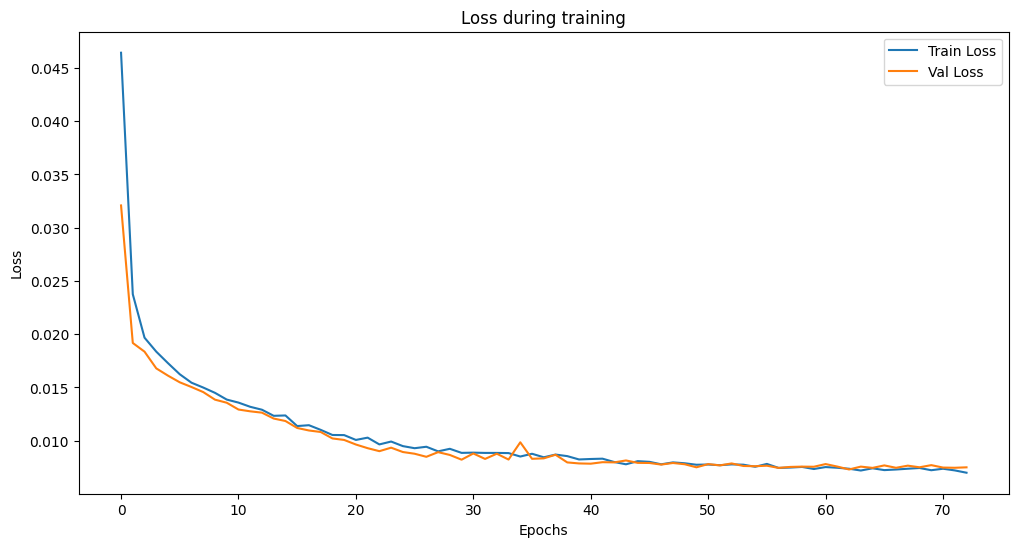

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0099 - mae: 0.0651 - mse: 0.0099
Validation Loss : 0.007294331211596727
Validation MAE: 0.0542922243475914
Validation MSE: 0.007294331211596727
Validation RMSE: 0.0854068569354752
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Test MAE: 244.60156835967692
Test MSE: 138087.00223843878
Test RMSE: 371.60059504586206
Test R²: 0.7146770187042414
Test CVRMSE: 0.5983871829170914


In [54]:
model2, history2, loss2, mae2, mse2, rmse2, mae_test2, mse_test2, rmse_test2, r2, cvrmse, predictions2 = model_lstm(
    X_train2, 
    y_train2, 
    X_test2, 
    y_test2, 
    scaler_X, 
    scaler_y
)
  

In [42]:
plot_true_vs_predicted_interactive(indices=[15, 11, 13,32,89], y_test=y_test2, predictions=predictions2, scaler_cons=scaler_y)
